In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
import pandas as pd

tsla_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/TSLA_data1.csv')
driv_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/DRIV_data1.csv')
lit_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/LIT_data1.csv')
ndx_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/NDX_data1.csv')
xly_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/XLY_data1.csv')
ndxl_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/NDXL_Normalised_OHLC_VWAP_VOL.csv')
tsla_norm_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/TSLA_Normalised_OHLC_VWAP_VOL.csv')


In [10]:
tsla_data['Daily_Return'] = tsla_data['Close'].pct_change()

print(tsla_data[['Date', 'Daily_Return']].head())


                        Date  Daily_Return
0  2018-04-20 00:00:00-04:00           NaN
1  2018-04-23 00:00:00-04:00     -0.023670
2  2018-04-24 00:00:00-04:00      0.000318
3  2018-04-25 00:00:00-04:00     -0.009772
4  2018-04-26 00:00:00-04:00      0.017065


In [11]:
drift = tsla_data['Daily_Return'].mean()

volatility = tsla_data['Daily_Return'].std()

print(f"Drift (Average Return): {drift:.6f}")
print(f"Volatility (Standard Deviation): {volatility:.6f}")



Drift (Average Return): 0.002673
Volatility (Standard Deviation): 0.040493


In [16]:
import numpy as np
import matplotlib.pyplot as plt

S0 = tsla_data['Close'].iloc[-1]  
T = 252  
N = 10000  

target_price = 450

final_prices = np.zeros(N)

for i in range(N):
    price_paths = np.zeros(T)  
    price_paths[0] = S0 

    for t in range(1, T):
        random_shocks = np.random.normal(0, 1)  
        price_paths[t] = price_paths[t - 1] * np.exp(
            (drift - 0.5 * volatility**2) * (1 / T) + volatility * random_shocks * np.sqrt(1 / T)
        )
    
    final_prices[i] = price_paths[-1]

probability_reach_target = np.sum(final_prices >= target_price) / N

print(f"Probability of TSLA reaching or exceeding target price {target_price}: {probability_reach_target:.2%}")


Probability of TSLA reaching or exceeding target price 450: 23.69%


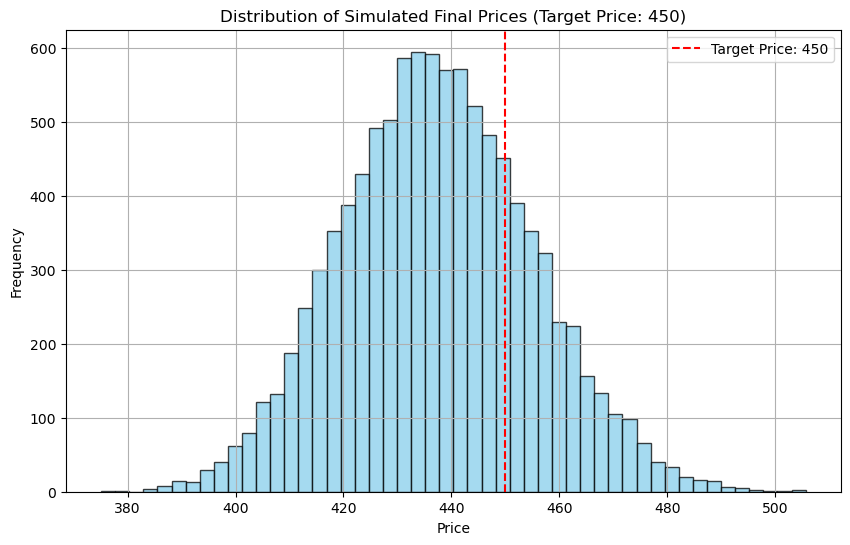

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(final_prices, bins=50, alpha=0.75, edgecolor='black', color='skyblue')
plt.axvline(target_price, color='red', linestyle='--', label=f"Target Price: {target_price}")
plt.title(f"Distribution of Simulated Final Prices (Target Price: {target_price})")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

output_dir = '/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/'
plt.savefig(f'{output_dir}/distribution_target_price_simulated_final_prices.png', dpi=300, bbox_inches='tight')
plt.show()  